In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.dates as mdates

#차분용
from statsmodels.tsa.stattools import adfuller

In [2]:
# 현재 작업 디렉터리 확인 및 파일 목록 보기
print("Current working directory:", os.getcwd())
print("Files in the current directory:", os.listdir())

Current working directory: g:\다른 컴퓨터\Desktop\학교자료\학교 자료\.학사과정\4학년1학기\비즈니스 어낼리틱스\Code\BOD_Prediction\conformal_prediction
Files in the current directory: ['predict.ipynb']


In [3]:
# CSV 파일 불러오기
bod_original = pd.read_csv('../../dataset/Original Dataset.csv')
bod_entire = pd.read_csv('../../dataset/Entire_dataset_5days_ago_final.csv')

# 데이터프레임의 첫 5개 행 출력
print("Original Dataset first 5 rows:")
print(bod_original.head())
print("Entire Dataset first 5 rows:")
print(bod_entire.head())

Original Dataset first 5 rows:
   location  company  reg_date  month  temper  rainfall  water_temper  in_bod  \
0        92    87103  20190101      1    -4.8       0.0           6.6    18.9   
1        92    87103  20190102      1    -4.4       0.0           6.6    16.9   
2        92    87103  20190103      1    -5.5       0.0           6.6    21.1   
3        92    87103  20190104      1    -2.8       0.0           6.5    16.4   
4        92    87103  20190105      1    -1.3       0.0           6.5    17.4   

   in_cod  in_ss   in_tn  in_tp  in_bac   flux  
0    21.0   13.3  14.184  0.946  5000.0  413.0  
1    19.0   10.0  13.651  0.955  5000.0  357.0  
2    18.4   17.3  17.357  0.850  4000.0  414.0  
3    18.3   10.3  19.003  0.886  2000.0  400.0  
4    18.2   11.7  18.773  0.907  4000.0  353.3  
Entire Dataset first 5 rows:
   location  company    reg_date  temper  rainfall  water_temper  in_bod  \
0        92    87103  2019-01-06    -5.5       0.0           6.6    16.2   
1      

# 데이터 분포 확인

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


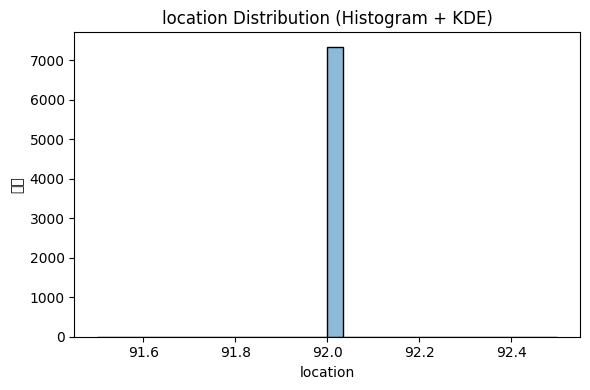

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


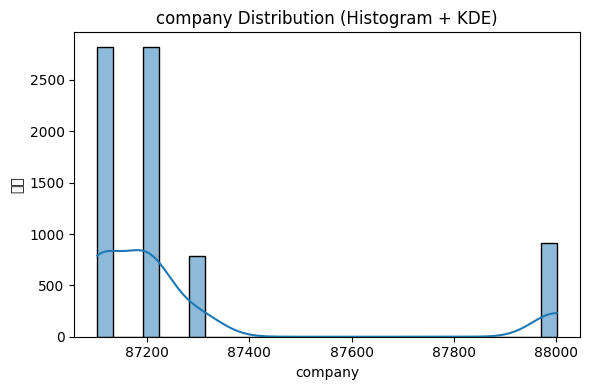

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


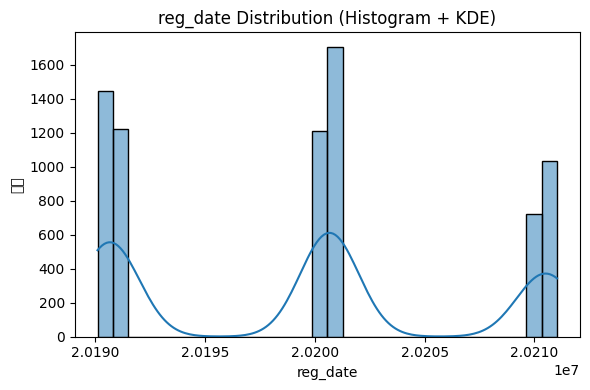

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


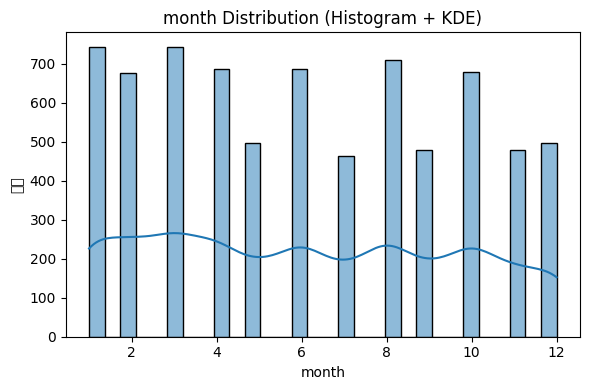

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


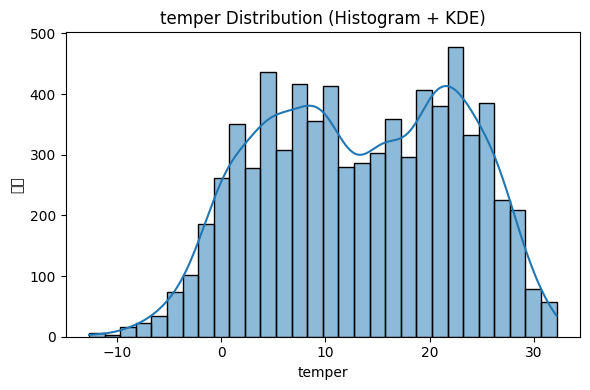

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


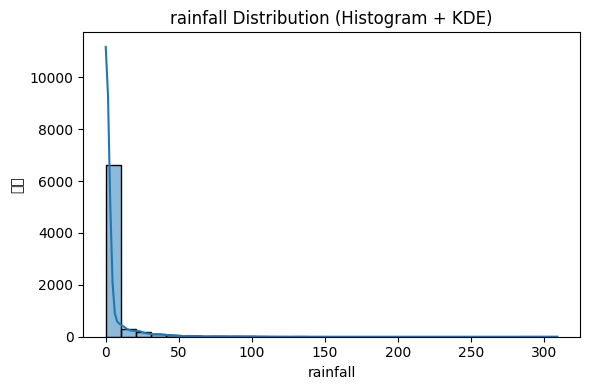

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


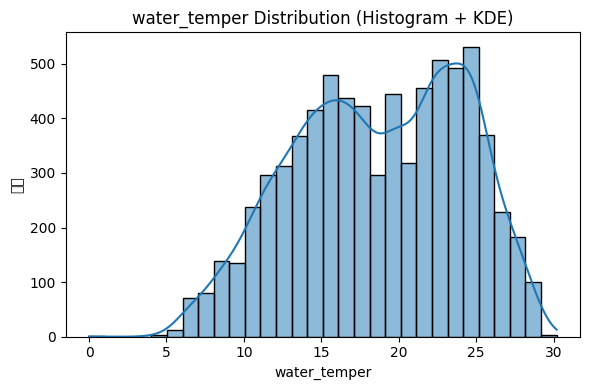

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


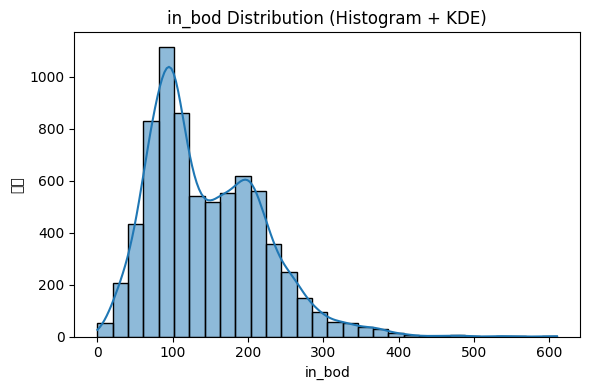

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


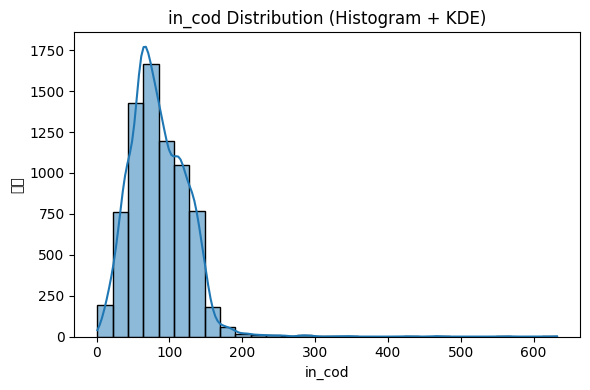

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


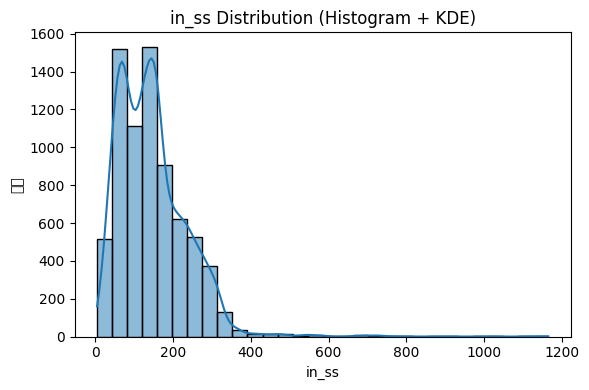

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


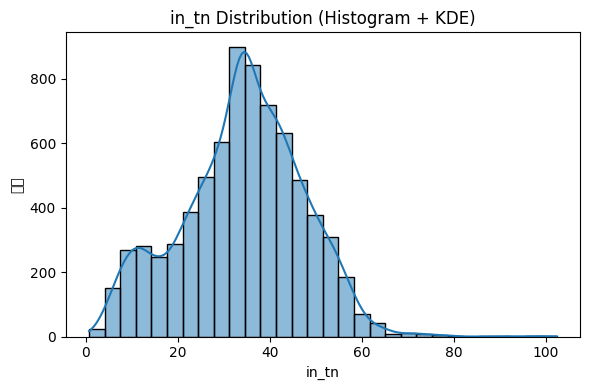

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


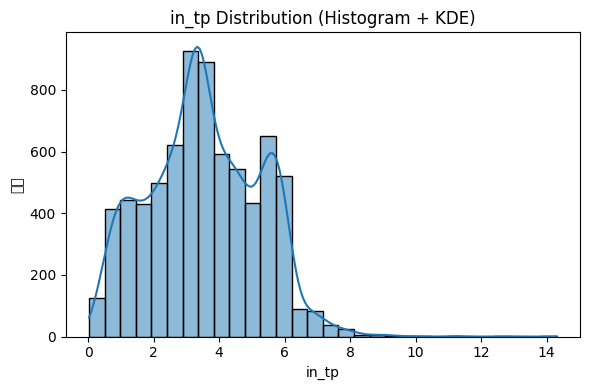

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


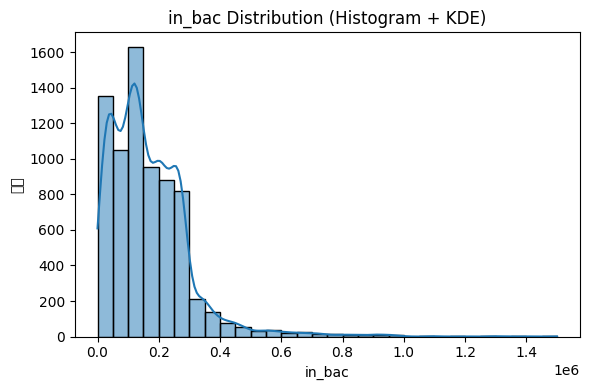

C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\2116605448.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vprai\anaconda3\envs\bod\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


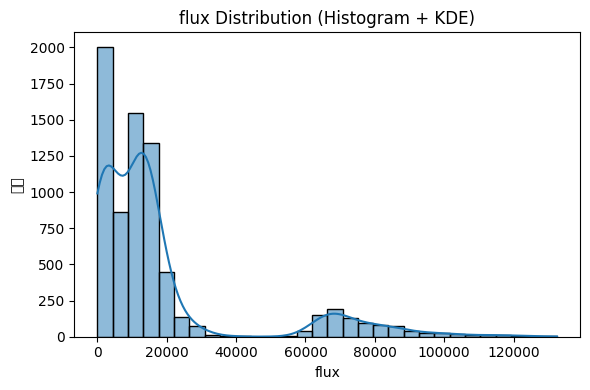

In [4]:
# 1) 변수 타입별로 분류
numeric_cols     = bod_original.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = bod_original.select_dtypes(include=['object','category']).columns.tolist()

# 2) 수치형 변수 분포 확인 (히스토그램 + KDE)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(bod_original[col].dropna(), kde=True, bins=30)
    plt.title(f'{col} Distribution (Histogram + KDE)')
    plt.xlabel(col)
    plt.ylabel('빈도')
    plt.tight_layout()
    plt.show()

# 3) 범주형 변수 분포 확인 (막대 그래프)
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    # 만약 고유값이 너무 많다면 상위 N개만 표시
    order = bod_original[col].value_counts().index
    sns.countplot(data=bod_original, y=col, order=order)
    plt.title(f'{col} Countplot (Countplot)')
    plt.xlabel('num')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [5]:
# 상관관계 분석

# 2) 수치형 변수만 선택하고 in_bod는 제외
numeric_cols = bod_original.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('in_bod')

# 3) 각 변수와 in_bod 간의 Pearson 상관계수 및 p-value 계산
results = []
for col in numeric_cols:
    clean_df = bod_original[['in_bod', col]].dropna()
    r, p = pearsonr(clean_df['in_bod'], clean_df[col])
    results.append({'feature': col, 'pearson_r': r, 'p_value': p})

# 4) 결과 DataFrame 생성 및 p-value 기준 정렬
results_df = pd.DataFrame(results).sort_values('p_value').reset_index(drop=True)

# 5) 결과 출력
print(results_df)

         feature  pearson_r        p_value
0         in_cod   0.756993   0.000000e+00
1          in_ss   0.630978   0.000000e+00
2          in_tp   0.642264   0.000000e+00
3          in_tn   0.626477   0.000000e+00
4         in_bac   0.375305  2.436249e-244
5           flux  -0.250022  4.702577e-105
6        company  -0.221365   3.389583e-82
7       rainfall  -0.075199   1.104565e-10
8         temper  -0.073405   3.023375e-10
9   water_temper   0.026924   2.104407e-02
10      reg_date   0.019017   1.032171e-01
11         month   0.008526   4.650992e-01
12      location        NaN            NaN


C:\Users\vprai\AppData\Local\Temp\ipykernel_48840\3870266060.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(clean_df['in_bod'], clean_df[col])


| 순위 | 변수            | 상관계수(r) | p-값      | 해석                                        |
| -- | ------------- | ------- | -------- | ----------------------------------------- |
| 1  | in\_cod       | +0.757  | ≈0       | BOD와 가장 강한 양의 선형관계. COD가 높을수록 BOD도 높아짐.   |
| 2  | in\_tp        | +0.642  | ≈0       | 총인과도 강한 양의 상관. 영양염류 농도가 높을수록 BOD 상승 경향.   |
| 3  | in\_ss        | +0.631  | ≈0       | 부유물질(SS)도 뚜렷한 양의 상관을 보임.                  |
| 4  | in\_tn        | +0.626  | ≈0       | 총질소 역시 높은 양의 상관관계.                        |
| 5  | in\_bac       | +0.375  | 2.4e-244 | 대장균군수와 중간 정도 양의 상관.                       |
| 6  | flux          | –0.250  | 4.7e-105 | 유량과는 음의 상관. 유량이 많을수록 BOD가 희석되어 낮아지는 경향.   |
| 7  | company       | –0.221  | 3.4e-82  | 회사 ID와 상관이 있지만, 수치형 인코딩된 범주형 변수라 해석 유의.   |
| 8  | rainfall      | –0.075  | 1.1e-10  | 강우량과 약한 음의 상관. 비가 올 때 BOD가 소폭 낮아질 수 있음.   |
| 9  | temper        | –0.073  | 3.0e-10  | 기온과도 약한 음의 상관. 낮은 기온일수록 BOD가 소폭 높아질 수 있음. |
| 10 | water\_temper | +0.027  | 0.021    | 수온과 거의 무시해도 될 수준의 약한 양의 상관.               |
| 11 | reg\_date     | +0.019  | 0.103    | 날짜 자체(시간 경과)와는 유의미한 상관 없음.                |
| 12 | month         | +0.009  | 0.465    | 월별 계절성 지표도 BOD와 관계 거의 없음.                 |


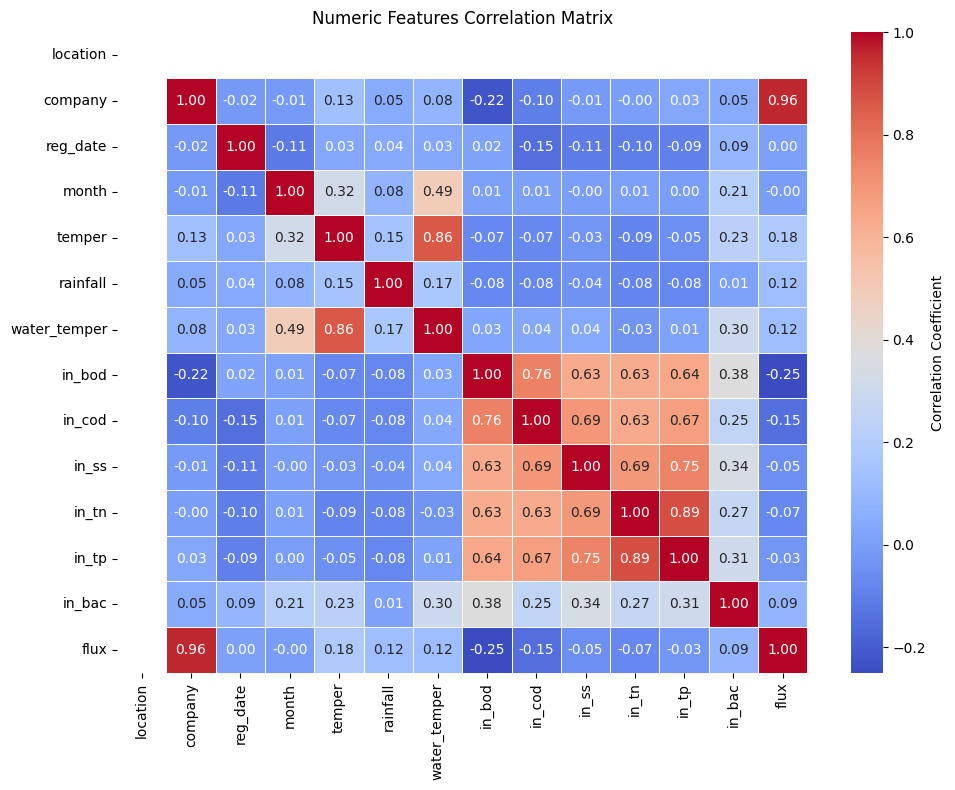

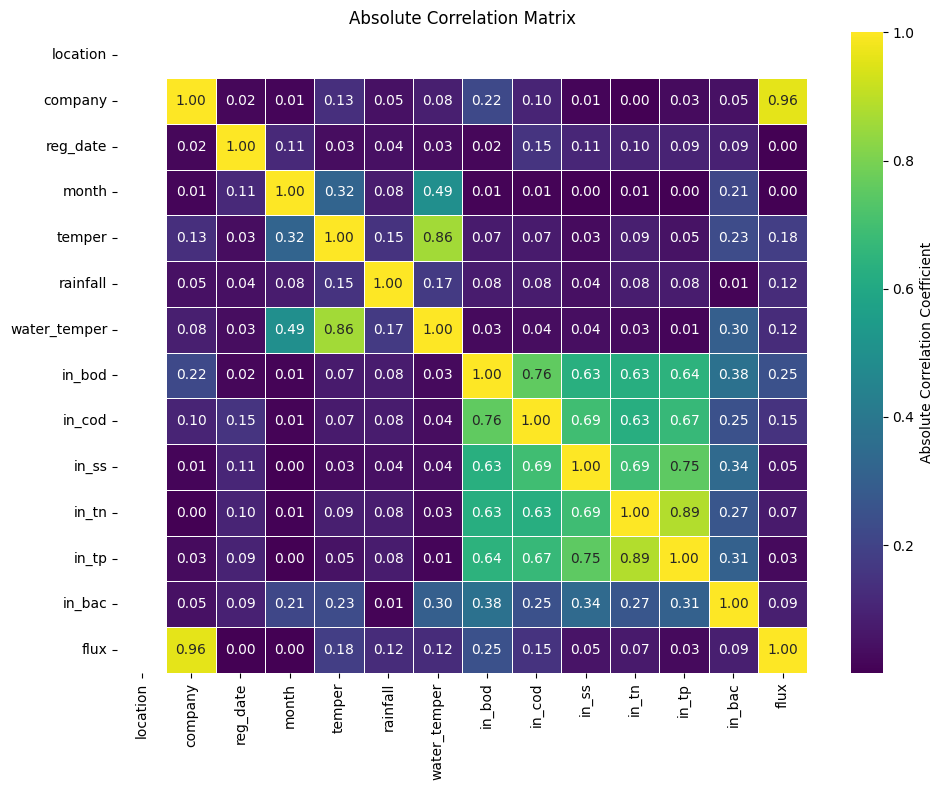

In [6]:
# 2) 수치형 변수만 선택
numeric_cols = bod_original.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3) 상관계수 행렬 계산
corr_matrix = bod_original[numeric_cols].corr()

# 4) 히트맵 그리기 (숫자 주석 포함)
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # 셀 내부에 숫자 표시
    fmt=".2f",         # 소수점 둘째 자리까지 포맷
    cmap="coolwarm",   # 컬러맵 (원하는 것으로 변경 가능)
    cbar_kws={"label": "Correlation Coefficient"},
    linewidths=0.5     # 셀 경계선 굵기
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Numeric Features Correlation Matrix')
plt.tight_layout()
plt.show()

# 4) 절댓값 상관계수 행렬
abs_corr = corr_matrix.abs()

# 5) 절댓값 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(
    abs_corr,
    annot=True,            # 셀 내부에 숫자 표시
    fmt=".2f",             # 소수점 둘째 자리까지
    cmap="viridis",        # 절댓값용 컬러맵 (원하는 것으로 변경 가능)
    cbar_kws={"label": "Absolute Correlation Coefficient"},
    linewidths=0.5
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Absolute Correlation Matrix')
plt.tight_layout()
plt.show()

In [7]:
# 변수 정의
endog = bod_original['in_bod']
exog = bod_original[['temper', 'rainfall', 'flux', 'in_cod', 'in_tp', 'in_ss']]

In [8]:
#정상성 검정(Stationarity Test)

adf_result = adfuller(bod_original['in_bod'].dropna())

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("시계열 데이터는 정상성을 만족합니다.")
else:
    print("시계열 데이터는 정상성을 만족하지 않습니다.")
    print("차분을 통해 정상성을 만족시킬 수 있습니다.")
    # 차분을 통해 정상성 확인
    bod_original['in_bod_diff'] = bod_original['in_bod'].diff().dropna()
    adf_result_diff = adfuller(bod_original['in_bod_diff'].dropna())
    print("ADF Statistic (Differenced):", adf_result_diff[0])
    print("p-value (Differenced):", adf_result_diff[1])

ADF Statistic: -13.941387818347826
p-value: 4.884576094351562e-26
시계열 데이터는 정상성을 만족합니다.


학습 및 예측

In [9]:
# 0) 최종 평가용 hold-out test 분할 (예: 마지막 20%)
split = int(len(endog) * 0.8)
endog_train, endog_test = endog[:split], endog[split:]
exog_train, exog_test = exog[:split], exog[split:]

In [10]:
import warnings
import numpy as np
import itertools
from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

warnings.filterwarnings("ignore")  # ConvergenceWarning 숨기기

# 1) 후보 파라미터 정의
p = [0,1,2]
d = [0,1]
q = [0,1,2]
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(P,1,Q,12) for P,Q in itertools.product([0,1],[0,1])]

# 2) Rolling-window CV 준비 (train 데이터만)
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# 3) CV 기반 하이퍼파라미터 탐색
best_rmse = np.inf
best_cfg = None

for order in tqdm(pdq, desc="Searching pdq"):
    for seasonal_order in tqdm(seasonal_pdq, desc=f"Seasonal for {order}", leave=False):
        rmses = []
        # train 데이터로만 split
        for train_idx, val_idx in tscv.split(endog_train):
            y_tr = endog_train.iloc[train_idx]
            X_tr = exog_train.iloc[train_idx]
            y_val = endog_train.iloc[val_idx]
            X_val = exog_train.iloc[val_idx]
            try:
                res = SARIMAX(
                    y_tr, exog=X_tr,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False
                ).fit(
                    disp=False,
                    method='powell',
                    maxiter=300
                )
                y_pred = res.predict(
                    start=val_idx[0],
                    end=val_idx[-1],
                    exog=X_val
                )
                rmses.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            except:
                # 실패한 split은 무시
                continue

        # split별 RMSE 평균
        avg_rmse = np.mean(rmses)
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_cfg = (order, seasonal_order)

print(f"\nBest Avg RMSE over {n_splits} folds: {best_rmse:.4f}")
print("Best Config:", best_cfg)

Searching pdq: 100%|██████████| 18/18 [26:31<00:00, 88.39s/it] 


Best Avg RMSE over 5 folds: 44.0385
Best Config: ((0, 0, 0), (1, 1, 1, 12))


In [11]:
# 4) 최종 모델 학습 & hold-out test 평가
order, seasonal_order = best_cfg
final_model = SARIMAX(
    endog_train, exog=exog_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False, method='powell', maxiter=300)

y_final_pred = final_model.predict(
    start=split, end=len(endog)-1,
    exog=exog_test
)
final_rmse = np.sqrt(mean_squared_error(endog_test, y_final_pred))
print(f"Hold-out Test RMSE: {final_rmse:.4f}")

Hold-out Test RMSE: 48.3141


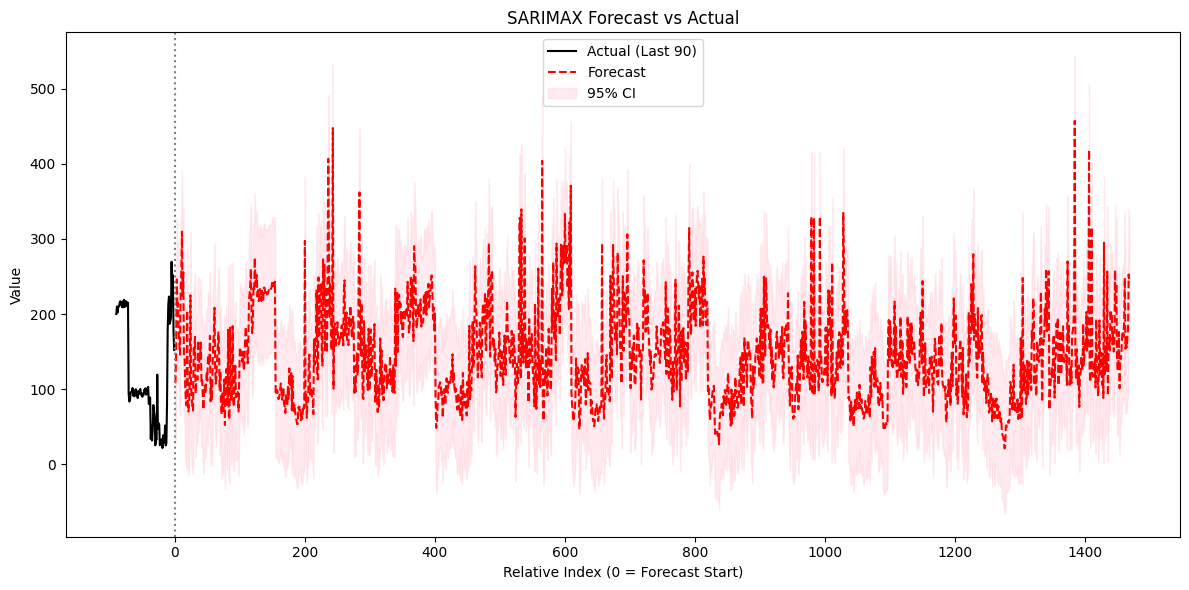

Evaluation Metrics:
 MAE : 36.937
 RMSE: 48.314
 R^2 : 0.609


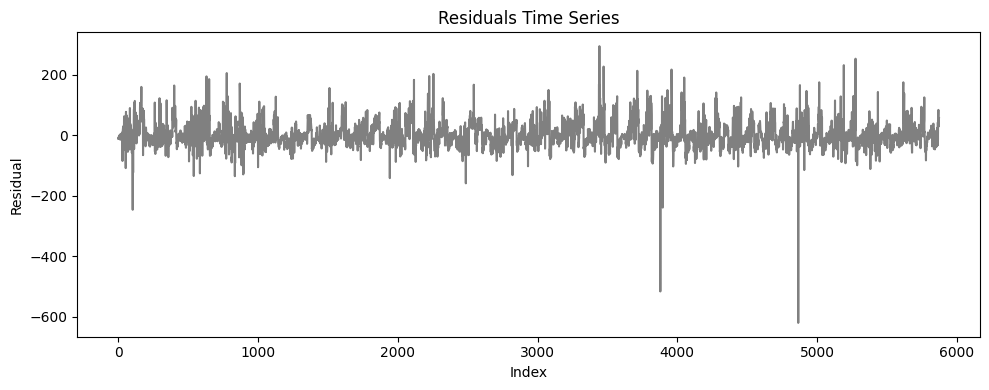

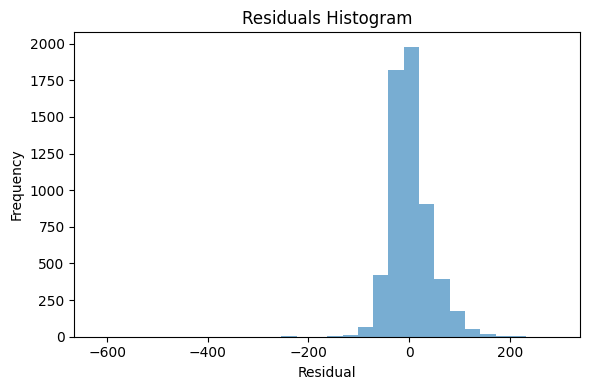

<Figure size 600x400 with 0 Axes>

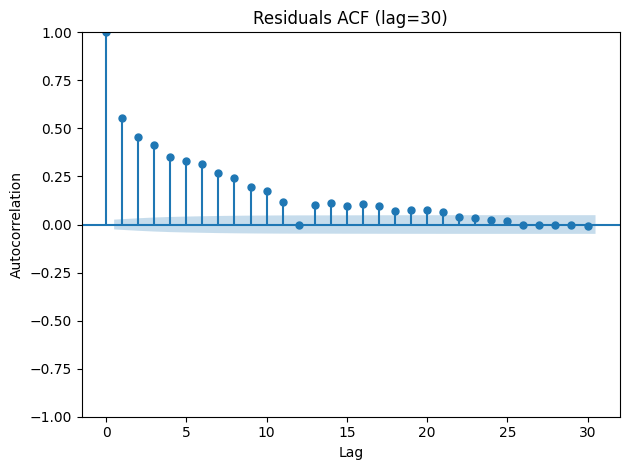

In [12]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf

warnings.filterwarnings("ignore")

# === 0) Hold-out 분할 이후 최종 모델(best_cfg) 학습 ===
# best_cfg = (best_order, best_seasonal)
order, seasonal_order = best_cfg
final_model = SARIMAX(
    endog_train,
    exog=exog_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False, method='powell', maxiter=300)

# === 1) Forecast 준비 ===
n_forecast = len(endog_test)  # 테스트 구간 길이로 예측
exog_forecast = exog_test.copy().iloc[:n_forecast]
forecast_obj = final_model.get_forecast(steps=n_forecast, exog=exog_forecast)
y_pred = forecast_obj.predicted_mean.values
conf_int = forecast_obj.conf_int(alpha=0.05).values
y_true = endog_test.values[:n_forecast]

# === 2) 상대 x축 정의 ===
h_past = 90  # 과거 시각화 기간
x_past = np.arange(-h_past, 0)
x_future = np.arange(0, n_forecast)

# 과거 시계열 (train의 마지막 h_past)
past_values = endog_train.values[-h_past:]

# === 3) 시각화 ===
plt.figure(figsize=(12,6))
# 과거
plt.plot(x_past, past_values, label='Actual (Last 90)', color='black')
# 테스트 실제값\plt.plot(x_future, y_true, label='Actual (Test)', color='blue')
# 예측값
plt.plot(x_future, y_pred, label='Forecast', color='red', linestyle='--')
# 신뢰구간
plt.fill_between(x_future, conf_int[:,0], conf_int[:,1], color='pink', alpha=0.3, label='95% CI')
# 경계 표시
plt.axvline(0, color='gray', linestyle=':')
plt.title('SARIMAX Forecast vs Actual')
plt.xlabel('Relative Index (0 = Forecast Start)')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

# === 4) 평가 지표 ===nmae = mean_absolute_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_true, y_pred)
print("Evaluation Metrics:")
print(f" MAE : {mae:.3f}")
print(f" RMSE: {rmse:.3f}")
print(f" R^2 : {r2:.3f}")

# === 5) 잔차 분석 ===
residuals = final_model.resid.dropna()

# 5.1) 잔차 시계열
plt.figure(figsize=(10,4))
plt.plot(residuals, color='gray')
plt.title('Residuals Time Series')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()

# 5.2) 잔차 분포
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, alpha=0.6)
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 5.3) 잔차 ACF
plt.figure(figsize=(6,4))
plot_acf(residuals, lags=30)
plt.title('Residuals ACF (lag=30)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.tight_layout()
plt.show()
